# Preference Analysis
Analyzing preferences to understand which courses are popular, which times are popular, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Start by just reading in the data files. Both the raw preferences, as well as the binary manipulations

In [7]:
# Read Data from Analysis folder
raw = pd.read_excel("../Resources/fall2017data.xlsx", delimiter=',')

# Read preference matricies (from Justina)
first = pd.read_csv("../Resources/FirstChoiceBinary.csv")
second = pd.read_csv("../Resources/SecondChoiceBinary.csv")
third = pd.read_csv("../Resources/ThirdChoiceBinary.csv")

In [14]:
# Drop first column from first, second, and third
for df in [first, second, third]:
    df.drop(df.columns[0], axis=1, inplace = True)

## Demand
Here we will look at the demand for courses

In [21]:
# look at demand in first choice
first_sizes = {}
for course in first.columns:
    first_sizes[course] = first[course].sum()

In [30]:
# Get largest course
l = max(first_sizes, key=first_sizes.get)
s = first_sizes[l]
print(l, "is has the greatest demand of", s)

P4_Researchers (8th Grade SS) is has the greatest demand of 42


Next we will group by period

In [66]:
# Orgainze Courses by Periods
first_by_period = {}
for p in [1,2,3,4, 7,8]:
    period = "Period " + str(p)
    P = "P"+str(p)
    hold = {}
    for course in first_sizes:
        if course[0:2] == P:
            hold[course]= first_sizes[course]
    first_by_period[period] = hold

Lets orgainse the second and thir choices the same was as we did first choices above:

In [68]:
# get demand numbers
second_sizes = {}
for course in second.columns:
    second_sizes[course] = second[course].sum()
    
third_sizes = {}
for course in third.columns:
    third_sizes[course] = third[course].sum()

In [69]:
# Organize by period
second_by_period = {}
third_by_period = {}
for p in [1,2,3,4, 7,8]:
    period = "Period " + str(p)
    P = "P"+str(p)
    hold = {}
    for course in second_sizes:
        if course[0:2] == P:
            hold[course]= second_sizes[course]
    second_by_period[period] = hold
    hold = {}
    for course in third_sizes:
        if course[0:2] == P:
            hold[course] = third_sizes[course]
    third_by_period[period] = hold

In [87]:
# Print demandas by period and course, as well as build dictionary for plotting
tri_dict = {}
for p in [1,2,3,4,7,8]:
    period_dict = {}
    print("Period", p, "Demands:")
    print("Course", 39*" ", "First\t Second\t Third")
    P = "Period " + str(p)
    x = sorted(first_by_period[P].items(), key=lambda x:(x[1], x[0]), reverse=True)
    for c in x:
        course = c[0]
        fnum = first_by_period[P][course]
        snum = second_by_period[P][course]
        tnum = third_by_period[P][course]
        period_dict[course] = [fnum, snum, tnum] # add to period dict
        ws = 45 - len(course)
        print(course, ws*" ", fnum, "\t", snum, "\t", tnum)
    print("\n")
    tri_dict[P] = period_dict

Period 1 Demands:
Course                                         First	 Second	 Third
P1_MS Health                                   32 	 17 	 24
P1_Other                                       31 	 38 	 40
P1_Advanced Algebra & Trigonometry             26 	 17 	 25
P1_HS PE                                       25 	 15 	 18
P1_Evolutionary Biology                        20 	 24 	 19
P1_7th-8th Grade Art                           20 	 14 	 17
P1_Pre-Calculus                                18 	 13 	 16
P1_Portfolio Photo                             16 	 19 	 17
P1_French B                                    14 	 14 	 13
P1_Middle School Social Studies with Dan       11 	 24 	 18
P1_Facing History                              11 	 7 	 6
P1_Constitutional Law/Government               10 	 15 	 16
P1_Spanish A                                   7 	 13 	 9
P1_HS English (TBA)                            5 	 16 	 7
P1_Algebra A                                   0.0 	 0.0 	 1


Period 2 Demands:

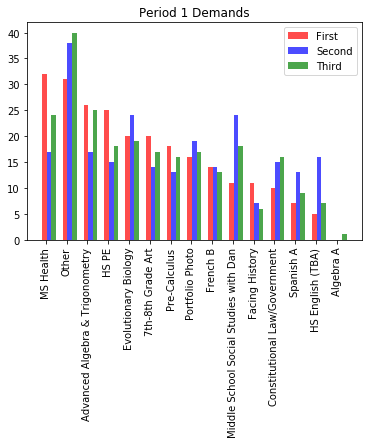

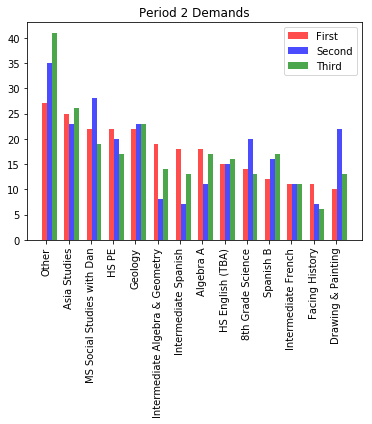

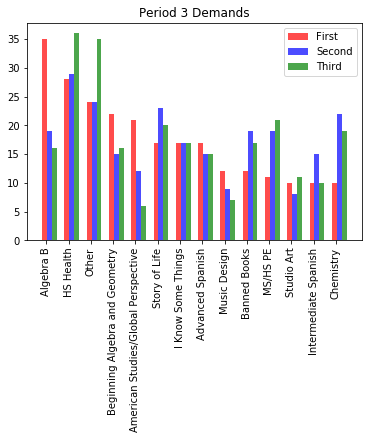

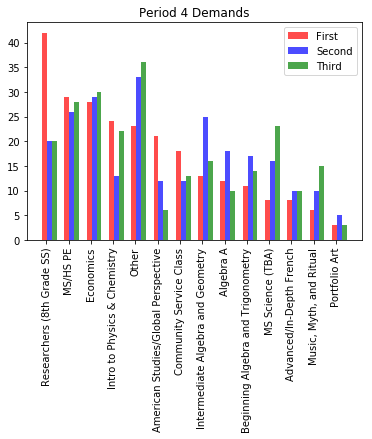

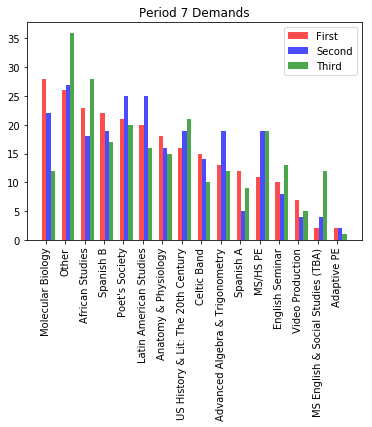

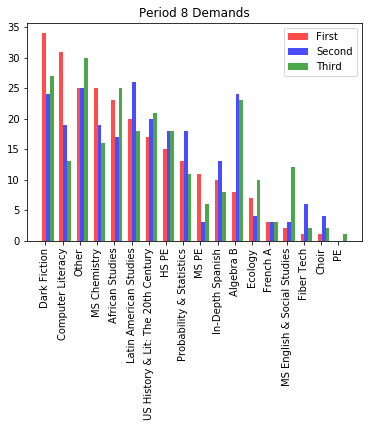

In [152]:
for p in [1,2,3,4,7,8]:
    x = tri_dict["Period " + str(p)]
    w = 0.22
    ind = np.arange(len(x))

    fig, ax = plt.subplots()

    b1 = ax.bar(ind, [y[0] for y in list(x.values())], w, color='r', alpha=.7)
    b2 = ax.bar(ind+w, [y[1] for y in list(x.values())], w,  color='b', alpha=.7)
    b3 = ax.bar(ind+2*w, [y[2] for y in list(x.values())],w,  color='g', alpha=.7)
    #negative = ax.bar(ind+3*w, [20 for y in range(len(x))], w)

    ax.set_xticks(ind + w/3)
    ax.set_xticklabels([y[3:] for y in list(x.keys())], rotation=90)

    ax.legend((b1[0], b2[0], b3[0]), ("First", "Second", "Third"))
    ax.set_title("Period " + str(p) +  " Demands")
    ax.autoscale_view()

    plt.show()

# Demand Heatmap

In [154]:
title = "Schedule Heat Map"
xlabel="Period"
ylabel="Course"

In [198]:
# make 2D numpy array for plot
data = np.zeros([18, 6])
labels = np.empty([18,6], dtype=object)

In [355]:
# Fill the arrays with first choices
i = 0
for p in [1,2,3,4,7,8]:
    x = sorted(first_by_period["Period " + str(p)].items(), key=lambda x:(x[1], x[0]), reverse=True)
    
    x_dat = [y[1] for y in x]
    x_lab = [y[0] for y in x]
    
    for j in range(len(x_dat)):
        data[j,i] = x_dat[j]
        labels[j,i] = x_lab[j][3:]
    
    i += 1

In [356]:
# Plot the data and key
plt.figure(figsize=(20,20))
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
c = plt.pcolor(data, cmap="plasma")
plt.colorbar(c)

In [357]:
# Add labels
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        plt.text(j+0.5, i+0.5, labels[i,j], horizontalalignment="center", fontsize=9, color="white")

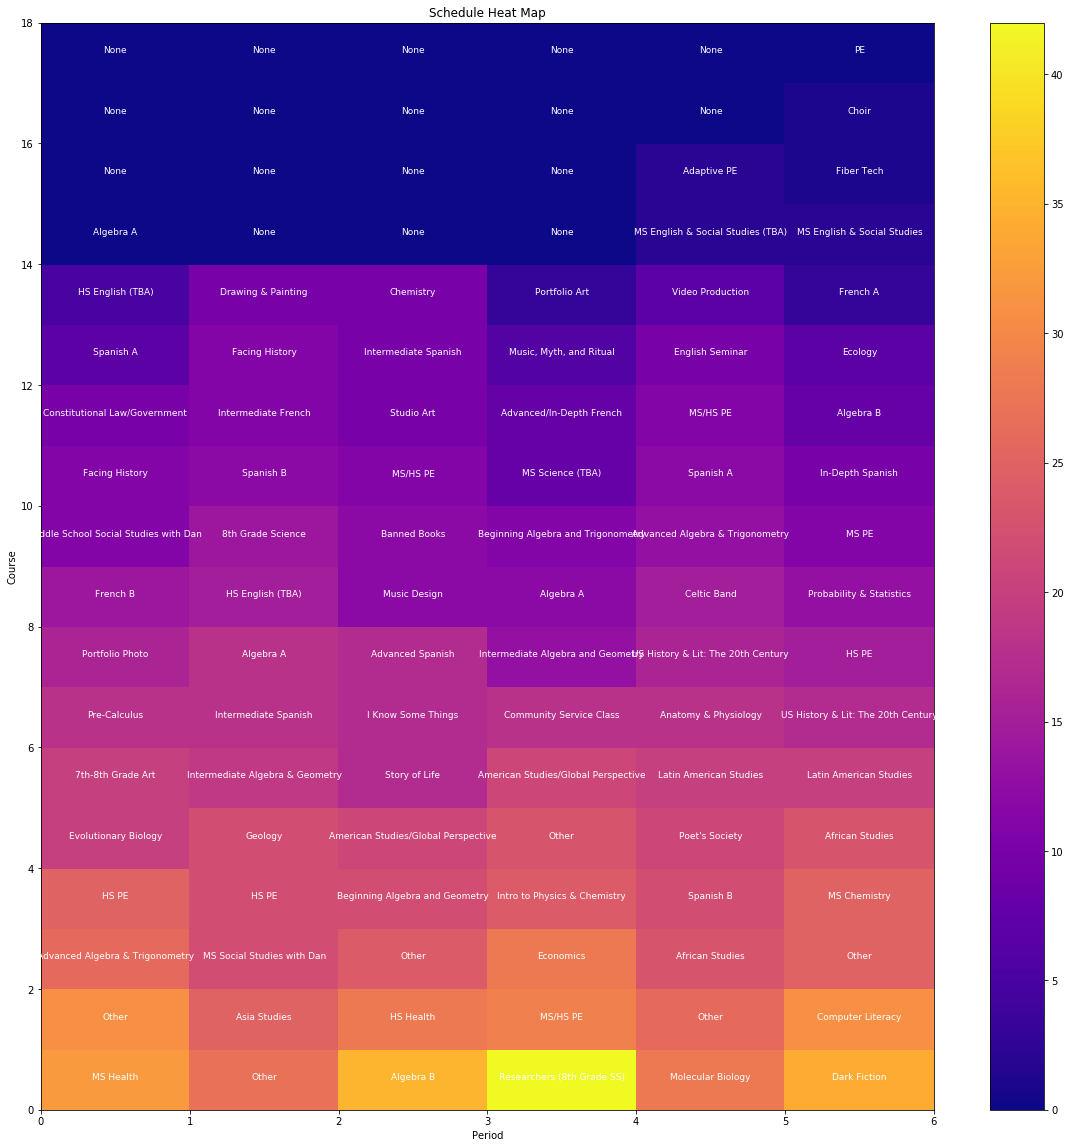

In [358]:
plt.show()
#plt.savefig("heatmap.png")